In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
from PIL import Image

2024-06-19 09:46:00.410162: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-19 09:46:00.416004: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-19 09:46:00.478823: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-19 09:46:01.902160: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
img = Image.open("/home/zephyr/Desktop/.code/college/alpr/images/0/1.jpg")

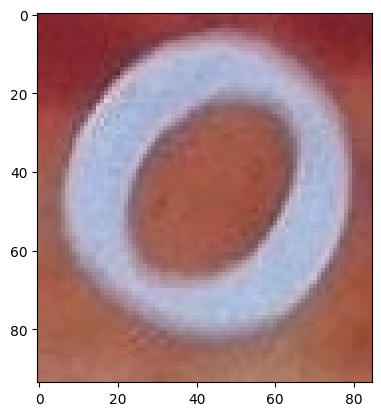

In [4]:
plt.imshow(img)

In [57]:
cv2.imread("/home/zephyr/Desktop/.code/college/alpr/images/0/1.jpg").shape

(94, 85, 3)

In [5]:
train = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [6]:
train_dataset = train.flow_from_directory('/home/zephyr/Desktop/.code/college/alpr/images/', 
                                          target_size=(28,28),
                                          batch_size=32,
                                          class_mode="categorical")
                                          

Found 2033 images belonging to 12 classes.


In [7]:
train_dataset.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9,
 'ba': 10,
 'pa': 11}

In [8]:
train_dataset.classes

array([ 0,  0,  0, ..., 11, 11, 11], dtype=int32)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28,28, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(12, activation='softmax')  # or Dense(number_of_classes, activation='softmax') for multi-class
])

/home/zephyr/Desktop/.code/college/alpr/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # or 'categorical_crossentropy' for multi-class
              metrics=['accuracy'])


In [11]:
model = model.fit(
    train_dataset,
    steps_per_epoch= 3,
    epochs=10, # Adjust the number of epochs as needed
)

Epoch 1/10


/home/zephyr/Desktop/.code/college/alpr/.venv/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.0378 - loss: 0.6441 
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.0247 - loss: 0.4437  
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.0508 - loss: 0.4021
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.0599 - loss: 0.4119
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.0807 - loss: 0.3743
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.1458 - loss: 0.3579
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.0807 - loss: 0.3577
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.1419 - loss: 0.3469
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.0938 - loss: 0.3364
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.0651 - loss: 0.3500


In [71]:
model.predict([train])[0]

AttributeError: 'History' object has no attribute 'predict'